In [1]:
import numpy as np 
import pandas as pd 
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import os
import glob
from sklearn.model_selection import train_test_split
import seaborn as sns
import datetime

In [2]:
for dirname, _, filenames in os.walk('archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive/symbols_valid_meta.csv
archive/etfs\AAAU.csv
archive/etfs\AADR.csv
archive/etfs\AAXJ.csv
archive/etfs\ABEQ.csv
archive/etfs\ACES.csv
archive/etfs\ACIO.csv
archive/etfs\ACSG.csv
archive/etfs\ACSI.csv
archive/etfs\ACT.csv
archive/etfs\ACWF.csv
archive/etfs\ACWI.csv
archive/etfs\ACWV.csv
archive/etfs\ACWX.csv
archive/etfs\ADME.csv
archive/etfs\ADRE.csv
archive/etfs\AESR.csv
archive/etfs\AFIF.csv
archive/etfs\AFK.csv
archive/etfs\AFLG.csv
archive/etfs\AFMC.csv
archive/etfs\AFSM.csv
archive/etfs\AFTY.csv
archive/etfs\AGG.csv
archive/etfs\AGGP.csv
archive/etfs\AGGY.csv
archive/etfs\AGND.csv
archive/etfs\AGQ.csv
archive/etfs\AGT.csv
archive/etfs\AGZ.csv
archive/etfs\AGZD.csv
archive/etfs\AIA.csv
archive/etfs\AIEQ.csv
archive/etfs\AIIQ.csv
archive/etfs\AIQ.csv
archive/etfs\AIRR.csv
archive/etfs\ALFA.csv
archive/etfs\ALTS.csv
archive/etfs\ALTY.csv
archive/etfs\AMCA.csv
archive/etfs\AMLP.csv
archive/etfs\AMOM.csv
archive/etfs\AMZA.csv
archive/etfs\ANGL.csv
archive/etfs\AOA.csv
archive/et

In [3]:
data = pd.read_csv('archive/stocks/AAPL.csv')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
5,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.399707,12157600
6,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.419162,9340800
7,1980-12-23,0.551339,0.553571,0.551339,0.551339,0.436848,11737600
8,1980-12-24,0.580357,0.582589,0.580357,0.580357,0.459840,12000800
9,1980-12-26,0.633929,0.636161,0.633929,0.633929,0.502287,13893600


In [4]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
data2=data.fillna(0)

In [6]:
data2=data2.loc[:, data2.columns!='Date']

In [7]:
data2.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Pre-Processing

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
data_scaled = sc.fit_transform(data2)

In [9]:
sns.set(rc = {'figure.figsize':(15,8)})

In [10]:
data2.tail()

,Open,High,Low,Close,Adj Close,Volume
9904,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,255.600006,262.489990,252.000000,254.289993,254.289993,49250500
9908,246.500000,248.720001,239.130005,240.910004,240.910004,43956200


In [11]:
data2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


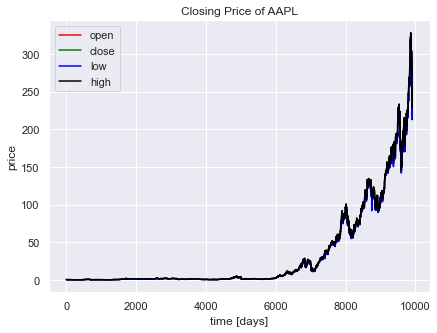

In [12]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(data2.Open.values, color='red', label='open')
plt.plot(data2.Close.values, color='green', label='close')
plt.plot(data2.Low.values, color='blue', label='low')
plt.plot(data2.High.values, color='black', label='high')
plt.title('Closing Price of AAPL')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

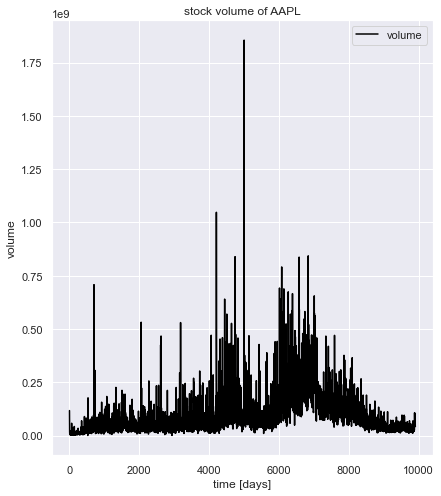

In [13]:
plt.subplot(1,2,2);
plt.plot(data2.Volume.values, color='black', label='volume')
plt.title('stock volume of AAPL')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [14]:
data1 = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])
for i in range(0,len(data1)):
    new_data['Date'][i] = data1['Date'][i]
    new_data['Close'][i] = data1['Close'][i]

In [15]:
new_data['Close']=new_data['Close'].astype(float, errors = 'raise')

In [16]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [17]:
new_data.dtypes

Close    float64
dtype: object

In [18]:
dataset = new_data.values

In [19]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

9414

In [20]:
train = dataset[0:987,:]
valid = dataset[987:,:]
valid

array([[  0.45982143],
       [  0.4419643 ],
       [  0.41517857],
       ...,
       [254.80999756],
       [254.28999329],
       [240.91000366]])

In [21]:
valid=pd.DataFrame(valid)
valid.columns=['Close']
valid

,Close
0,0.459821
1,0.441964
2,0.415179
3,0.430804
4,0.419643
...,...
8917,258.440002
8918,247.740005
8919,254.809998
8920,254.289993


In [22]:
scalar = MinMaxScaler(feature_range = (0,1))
data_scaled = scalar.fit_transform(dataset)

In [23]:
X = []
Y = []
size=100
for i in range(1 , len(new_data) - size -1 , 1):
    first = data2.iloc[i,2]
    temp = []
    temp1 = []
    for j in range(size):
        temp.append((data.iloc[i + j, 2] - first) / first)
    temp1.append((data2.iloc[i + size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp1).reshape(1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [24]:
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train1 = np.reshape(y_train, (y_train.shape[0],1))

In [25]:
X_test1 = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# RNN 

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import SimpleRNN
from keras.layers import LSTM

In [27]:
model1 = Sequential()

In [28]:
model1.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units = 50))
model1.add(Dropout(0.2))
model1.add(Dense(units = 1))

In [29]:
model1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [30]:
model1.fit(X_train1, y_train1, batch_size = 200, epochs = 10, verbose=2)

Epoch 1/10
40/40 - 10s - loss: 0.2433 - accuracy: 0.0023 - 10s/epoch - 249ms/step
Epoch 2/10
40/40 - 6s - loss: 0.1017 - accuracy: 0.0024 - 6s/epoch - 145ms/step
Epoch 3/10
40/40 - 6s - loss: 0.0629 - accuracy: 0.0029 - 6s/epoch - 139ms/step
Epoch 4/10
40/40 - 6s - loss: 0.0417 - accuracy: 0.0028 - 6s/epoch - 140ms/step
Epoch 5/10
40/40 - 6s - loss: 0.0311 - accuracy: 0.0029 - 6s/epoch - 146ms/step
Epoch 6/10
40/40 - 6s - loss: 0.0233 - accuracy: 0.0029 - 6s/epoch - 140ms/step
Epoch 7/10
40/40 - 6s - loss: 0.0183 - accuracy: 0.0029 - 6s/epoch - 150ms/step
Epoch 8/10
40/40 - 7s - loss: 0.0145 - accuracy: 0.0029 - 7s/epoch - 166ms/step
Epoch 9/10
40/40 - 6s - loss: 0.0124 - accuracy: 0.0029 - 6s/epoch - 156ms/step
Epoch 10/10
40/40 - 7s - loss: 0.0119 - accuracy: 0.0029 - 7s/epoch - 163ms/step


In [31]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scalar.transform(inputs)

In [32]:
X_test1 = []
for i in range(100,inputs.shape[0]):
    X_test1.append(inputs[i-100:i,0])
X_test1 = np.array(X_test1)

X_test1 = np.reshape(X_test1, (X_test1.shape[0],X_test1.shape[1],1))
closing_price1 = model1.predict(X_test1)
closing_price1 = scalar.inverse_transform(closing_price1)

278/278 [==============================] - 6s 19ms/step


In [34]:
valid1 = new_data[1027:]
rms1=np.sqrt(np.mean(np.power((valid1-closing_price1),2)))
rms1

Close    10.508171
dtype: float64

In [35]:
valid1['Predictions'] = closing_price1

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/4114925822.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



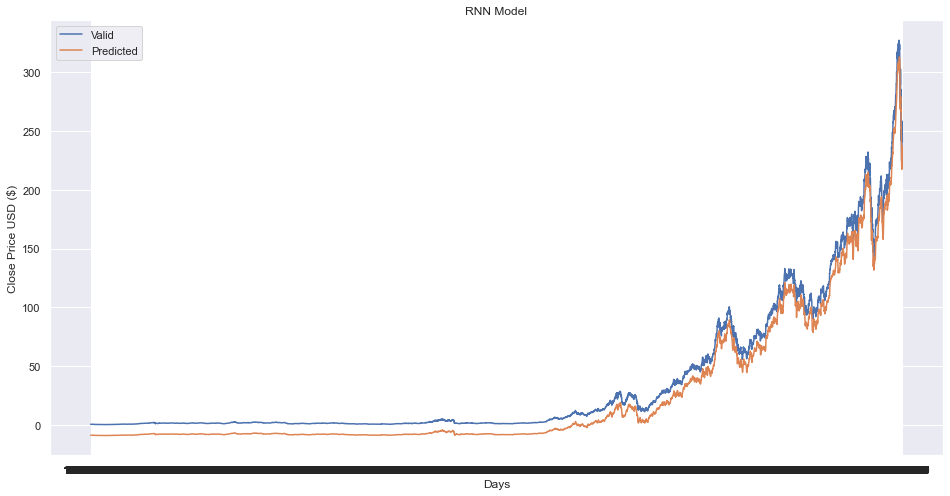

In [36]:
plt.figure(figsize=(16,8))
plt.title("RNN Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
#plt.plot(data2['Close'])
plt.plot(valid1[['Close', 'Predictions']])
plt.legend(["Valid", 'Predicted'])
plt.show()

# LSTM

In [37]:
X_train2, y_train2 = np.array(X_train), np.array(y_train)
X_train2 = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [38]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape = (X_train2.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [39]:
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])

In [40]:
model.fit(X_train2, y_train2, epochs = 10, batch_size = 200, verbose=2)

Epoch 1/10
40/40 - 9s - loss: 0.0161 - accuracy: 0.0029 - 9s/epoch - 231ms/step
Epoch 2/10
40/40 - 6s - loss: 0.0047 - accuracy: 0.0029 - 6s/epoch - 152ms/step
Epoch 3/10
40/40 - 6s - loss: 0.0039 - accuracy: 0.0029 - 6s/epoch - 159ms/step
Epoch 4/10
40/40 - 6s - loss: 0.0036 - accuracy: 0.0029 - 6s/epoch - 161ms/step
Epoch 5/10
40/40 - 6s - loss: 0.0033 - accuracy: 0.0029 - 6s/epoch - 156ms/step
Epoch 6/10
40/40 - 6s - loss: 0.0031 - accuracy: 0.0029 - 6s/epoch - 147ms/step
Epoch 7/10
40/40 - 6s - loss: 0.0028 - accuracy: 0.0029 - 6s/epoch - 147ms/step
Epoch 8/10
40/40 - 6s - loss: 0.0026 - accuracy: 0.0029 - 6s/epoch - 152ms/step
Epoch 9/10
40/40 - 6s - loss: 0.0024 - accuracy: 0.0029 - 6s/epoch - 148ms/step
Epoch 10/10
40/40 - 6s - loss: 0.0023 - accuracy: 0.0029 - 6s/epoch - 149ms/step


In [41]:
X_test2 = []
for i in range(100,inputs.shape[0]):
    X_test2.append(inputs[i-100:i,0])
X_test2 = np.array(X_test2)

X_test2 = np.reshape(X_test2, (X_test2.shape[0],X_test2.shape[1],1))
closing_price1 = model.predict(X_test2)
closing_price1 = scalar.inverse_transform(closing_price1)

278/278 [==============================] - 5s 16ms/step


In [43]:
valid = new_data[1027:]
rms=np.sqrt(np.mean(np.power((valid-closing_price1),2)))
rms

Close    10.419037
dtype: float64

In [46]:
valid['Predictions'] = closing_price1

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/4044917624.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



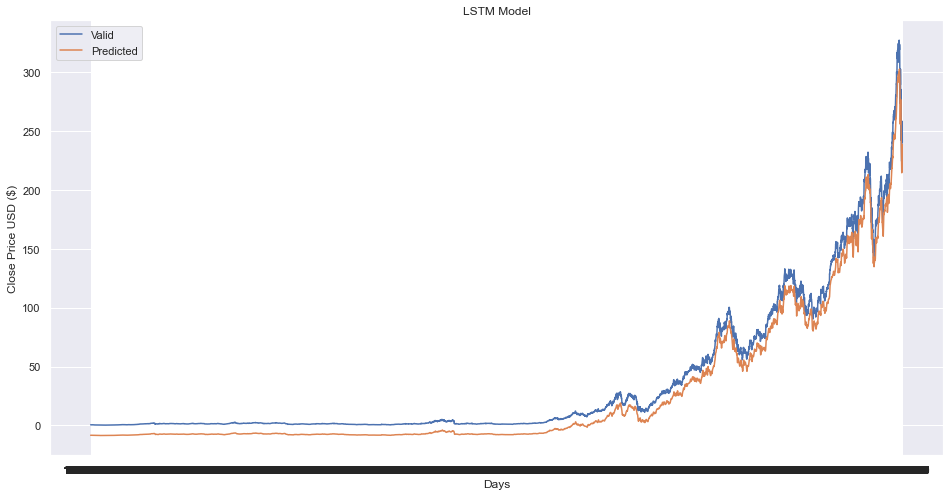

In [47]:
plt.figure(figsize=(16,8))
plt.title("LSTM Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
#plt.plot(data2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Valid", 'Predicted'])
plt.show()

# Convolution Neural Network

In [48]:
X_train3 = X_train.reshape(X_train.shape[0],1,100,1)
X_test3 = X_test2.reshape(X_test2.shape[0],1,100,1)

In [49]:
model = tf.keras.Sequential()

In [50]:
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [51]:
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=2, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=2, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=2, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers8
model.add(Dense(1, activation='linear'))

In [52]:
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [53]:
model.fit(X_train3,y_train,batch_size = 200, epochs=10, verbose=2)

Epoch 1/10
40/40 - 8s - loss: 0.1181 - accuracy: 0.0028 - 8s/epoch - 188ms/step
Epoch 2/10
40/40 - 1s - loss: 0.0343 - accuracy: 0.0029 - 1s/epoch - 29ms/step
Epoch 3/10
40/40 - 1s - loss: 0.0195 - accuracy: 0.0029 - 1s/epoch - 28ms/step
Epoch 4/10
40/40 - 1s - loss: 0.0156 - accuracy: 0.0029 - 1s/epoch - 27ms/step
Epoch 5/10
40/40 - 1s - loss: 0.0129 - accuracy: 0.0029 - 1s/epoch - 27ms/step
Epoch 6/10
40/40 - 1s - loss: 0.0117 - accuracy: 0.0029 - 1s/epoch - 27ms/step
Epoch 7/10
40/40 - 1s - loss: 0.0125 - accuracy: 0.0029 - 1s/epoch - 28ms/step
Epoch 8/10
40/40 - 1s - loss: 0.0112 - accuracy: 0.0029 - 1s/epoch - 30ms/step
Epoch 9/10
40/40 - 1s - loss: 0.0111 - accuracy: 0.0029 - 1s/epoch - 33ms/step
Epoch 10/10
40/40 - 1s - loss: 0.0098 - accuracy: 0.0029 - 1s/epoch - 31ms/step


In [54]:
closing_price2 = model.predict(X_test3)
closing_price2 = scalar.inverse_transform(closing_price2)

278/278 [==============================] - 2s 3ms/step


In [55]:
rms=np.sqrt(np.mean(np.power((valid-closing_price2),2)))
rms

Close          14.761000
Predictions    11.785358
dtype: float64

In [56]:
valid['Predictions'] = closing_price2

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/4241695185.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



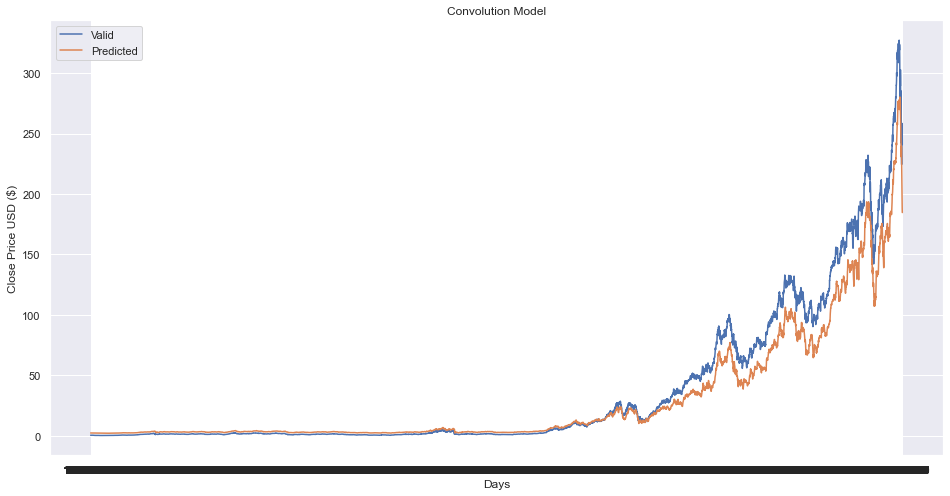

In [57]:
plt.figure(figsize=(16,8))
plt.title("Convolution Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
#plt.plot(data2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend([ "Valid", 'Predicted'])
plt.show()

# Hybrid Algorthim

In [58]:
X_train4 = np.reshape(new_data.values[:,-1:],newshape=(-1,1,1))
y_train4 = np.reshape(new_data.values[:,-1:],newshape=(-1,1,1))
X_test4 = np.reshape(new_data.values[:8882,:],newshape=(-1,1,1))
X_train4.shape,y_train4.shape,X_test4.shape

((9909, 1, 1), (9909, 1, 1), (8882, 1, 1))

In [59]:
X_train4

array([[[  0.51339287]],

       [[  0.48660713]],

       [[  0.45089287]],

       ...,

       [[254.80999756]],

       [[254.28999329]],

       [[240.91000366]]])

In [60]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D

In [61]:
model=tf.keras.Sequential()

In [62]:
model.add(Embedding(25000, 100))
model.add(Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1)))
model.add(GlobalMaxPool1D())
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
model.fit(X_train4, y_train4, batch_size=100, epochs=10)

Epoch 1/10
100/100 [==============================] - 6s 19ms/step - loss: -575.6213 - accuracy: 0.0014
Epoch 2/10
100/100 [==============================] - 2s 18ms/step - loss: -19750.8320 - accuracy: 0.0014
Epoch 3/10
100/100 [==============================] - 2s 19ms/step - loss: -66601.0938 - accuracy: 0.0014
Epoch 4/10
100/100 [==============================] - 2s 20ms/step - loss: -124107.3750 - accuracy: 0.0014
Epoch 5/10
100/100 [==============================] - 2s 19ms/step - loss: -193120.8906 - accuracy: 0.0014
Epoch 6/10
100/100 [==============================] - 2s 19ms/step - loss: -271393.9375 - accuracy: 0.0014
Epoch 7/10
100/100 [==============================] - 2s 19ms/step - loss: -362586.3438 - accuracy: 0.0014
Epoch 8/10
100/100 [==============================] - 2s 19ms/step - loss: -464924.0625 - accuracy: 0.0014
Epoch 9/10
100/100 [==============================] - 2s 20ms/step - loss: -576293.6250 - accuracy: 0.0014
Epoch 10/10
100/100 [=====================

In [65]:
closing_price4 = model.predict(X_test4)
closing_price4 = scalar.inverse_transform(closing_price4)

278/278 [==============================] - 1s 1ms/step


In [66]:
valid = new_data[1027:]
rms=np.sqrt(np.mean(np.power((valid-closing_price4),2)))
rms

Close    266.768358
dtype: float64

In [67]:
valid['Predictions'] = closing_price4

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/2437876985.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



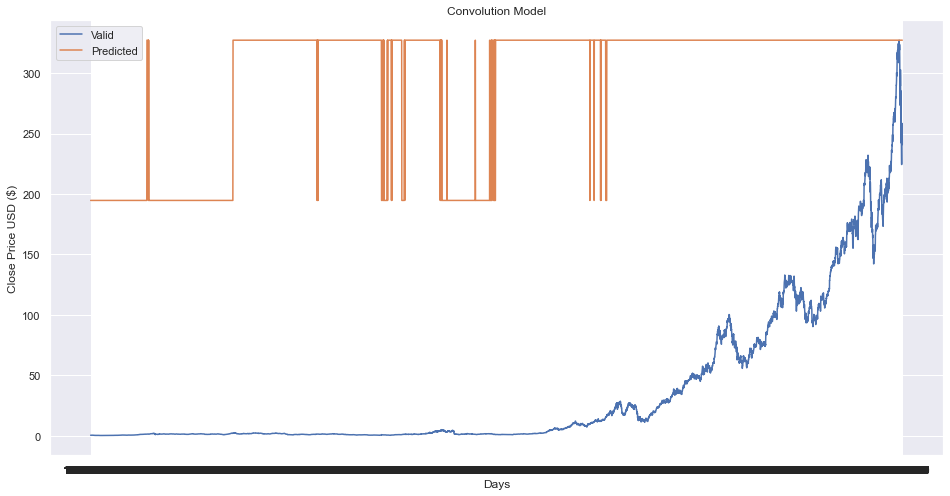

In [68]:
plt.figure(figsize=(16,8))
plt.title("Convolution Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
#plt.plot(data2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Valid", 'Predicted'])
plt.show()

# Feed Forword Neural Network

In [69]:
train1 = data.iloc[:training_data_len]
test1 = data.iloc[training_data_len:]
features = ['Close']

In [70]:
X_train5 = train1[features]
y_train2 = train1['Adj Close']
X_test5 = test1[features]
y_test = test1['Adj Close']

In [71]:
from sklearn import preprocessing
from keras import optimizers
X_train5 = preprocessing.normalize(X_train5)
X_test5 = preprocessing.normalize(X_test5)

In [72]:
X_train5=X_train5.astype(float)
y_train2=y_train2.astype(float)
X_test5=X_test5.astype(float)

In [73]:
X_train5

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [76]:
model = Sequential()
model.add(Dense(units=500, input_dim=2,activation="relu",kernel_initializer="random_uniform"))
model.add(Dropout(0.30))
model.add(Dense(units=300, activation="relu", kernel_initializer="random_uniform"))
model.add(Dropout(0.25))
model.add(Dense(units=200, activation="relu", kernel_initializer="random_uniform"))
model.add(Dropout(0.20))
model.add(Dense(units=100, activation="relu", kernel_initializer="random_uniform"))
model.add(Dropout(0.15))
model.add(Dense(units=50, activation="relu", kernel_initializer="random_uniform"))
model.add(Dropout(0.10))
model.add(Dense(units=25, activation="relu", kernel_initializer="random_uniform"))
model.add(Dropout(0.05))
model.add(Dense(units=2, activation="softmax"))

In [77]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [78]:
model.fit(X_train5, y_train2, epochs=10, batch_size=200, verbose=2)

Epoch 1/10


ValueError: in user code:

    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "D:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_5" (type Sequential).
    
    Input 0 of layer "dense_7" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer "sequential_5" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=True
      • mask=None


In [ ]:
model.evaluate(X_test5, y_test)

In [ ]:
closing_price3 = model.predict(X_test5)
closing_price3 = scalar.inverse_transform(closing_price3)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price3),2)))
rms

In [ ]:
valid['Predictions'] = closing_price3

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Feed Forward Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

# Decision Trees 

In [79]:
data3 = data2['Close']
data3

0         0.513393
1         0.486607
2         0.450893
3         0.462054
4         0.475446
           ...    
9904    258.440002
9905    247.740005
9906    254.809998
9907    254.289993
9908    240.910004
Name: Close, Length: 9909, dtype: float64

In [80]:
data3 = pd.DataFrame(data3)

In [81]:
future_days = 100
data3['Prediction'] = data3['Close'].shift(-future_days)

In [82]:
X = np.array(data3.drop(['Prediction'], 1))[:-future_days]
print(X)

[[  0.51339287]
 [  0.48660713]
 [  0.45089287]
 ...
 [257.5       ]
 [257.13000488]
 [257.23999023]]


C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/3239687401.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [83]:
y = np.array(data3['Prediction'])[:-future_days]
print(y)

[  0.4955357    0.5          0.4888393  ... 254.80999756 254.28999329
 240.91000366]


In [84]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size = 0.2)

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [86]:
model= DecisionTreeRegressor()

In [87]:
model.fit(X_train6, y_train6)

DecisionTreeRegressor()

In [88]:
x_future = data3.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/2191783318.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [89]:
tree_prediction = model.predict(x_future)
print(tree_prediction)

[264.47000122 260.14001465 262.20001221 261.95999146 264.47000122
 262.64001465 265.76000977 267.1000061  260.14001465 263.19000244
 262.01000977 261.77999878 266.36999512 209.00999451 300.3500061
 216.69999695 264.16000366 270.70999146 261.73999023 265.57998657
 270.70999146 266.92001343 268.48001099 270.76998901 271.45999146
 275.1499939  279.85998535 280.41000366 279.73999023 318.30999756
 279.44000244 284.         284.26998901 219.80000305 205.52999878
 291.51998901 293.6499939  300.3500061  297.42999268 142.19000244
 298.39001465 264.16000366 309.63000488 316.95999146 316.95999146
 311.33999634 311.33999634 315.23999023 318.73001099 316.57000732
 317.70001221 156.22999573 318.30999756 308.95001221 217.67999268
 324.33999634 323.86999512 309.51000977 308.66000366 318.8500061
 321.45001221 324.95001221 320.02999878 321.54998779 319.60998535
 327.20001221 324.86999512 324.95001221 319.         174.24000549
 320.29998779 313.04998779 298.17999268 288.07998657 292.6499939
 273.51998901

In [90]:
predictions = tree_prediction 
valid = data3[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/1510866107.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



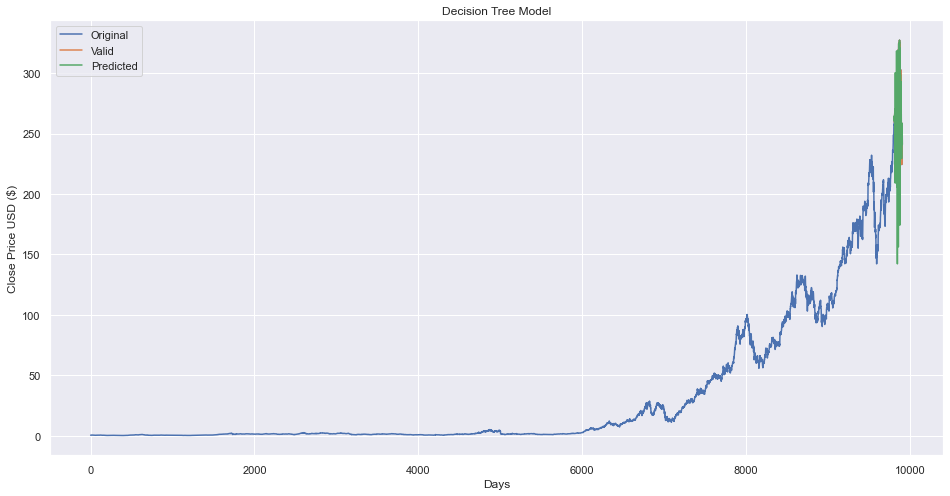

In [91]:
plt.figure(figsize=(16,8))
plt.title("Decision Tree Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data3['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

# Linear and Logistic Regression 

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
model = LinearRegression()

In [94]:
model.fit(X_train6, y_train6)

LinearRegression()

In [95]:
x_future = data3.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/1128973448.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



array([[198.44999695],
       [197.86999512],
       [199.46000671],
       [198.77999878],
       [198.58000183],
       [195.57000732],
       [199.80000305],
       [199.74000549],
       [197.91999817],
       [201.55000305],
       [202.72999573],
       [204.41000366],
       [204.22999573],
       [200.02000427],
       [201.24000549],
       [203.22999573],
       [201.75      ],
       [203.30000305],
       [205.21000671],
       [204.5       ],
       [203.3500061 ],
       [205.66000366],
       [202.58999634],
       [207.22000122],
       [208.83999634],
       [208.66999817],
       [207.02000427],
       [207.74000549],
       [209.67999268],
       [208.77999878],
       [213.03999329],
       [208.42999268],
       [204.02000427],
       [193.33999634],
       [197.        ],
       [199.03999329],
       [203.42999268],
       [200.99000549],
       [200.47999573],
       [208.97000122],
       [202.75      ],
       [201.74000549],
       [206.5       ],
       [210

In [96]:
lr_prediction = model.predict(x_future)
print(lr_prediction)

[216.07650054 215.44562261 217.17510549 216.4354492  216.21790909
 212.94388643 217.54492534 217.47966496 215.50001178 219.44843035
 220.73192863 222.55930207 222.36350435 217.78422444 219.11124069
 221.2757872  219.66597046 221.35193537 223.42947911 222.65719263
 221.40632455 223.91894851 220.57964889 225.61578461 227.37788109
 227.19297116 225.3982445  226.18140218 228.29155951 227.31262071
 231.9462898  226.93191307 222.13509305 210.51826524 214.49931399
 216.71824968 221.49332731 218.8393114  218.28456503 227.51928963
 220.75368762 219.65509927 224.83262693 229.02034461 229.0312158
 231.51120958 231.31542846 220.63403807 224.82175574 222.28737278
 223.77753997 227.56279101 227.26911933 223.96244989 227.75858873
 232.2073479  232.1855889  233.1754155  235.92733856 243.42170907
 242.8778505  238.15716204 239.40803013 240.27820717 242.52978964
 240.56102425 237.0476859  238.12453186 236.99329672 240.63715582
 239.39715893 238.23331021 243.8350469  244.50942622 238.38558995
 240.408744

In [97]:
predictions = lr_prediction 
valid = data3[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/540213385.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



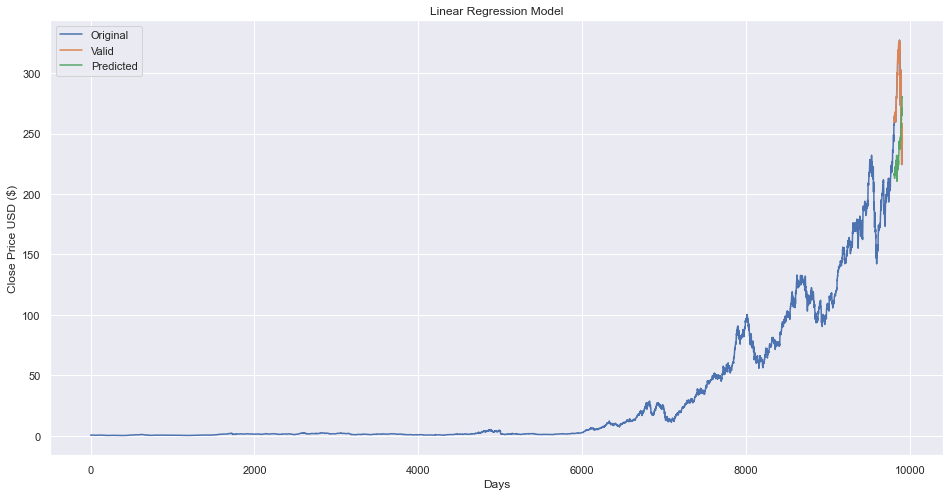

In [98]:
plt.figure(figsize=(16,8))
plt.title("Linear Regression Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data3['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [99]:
from sklearn. preprocessing import StandardScaler
scalar = StandardScaler()
X_train7 = scalar.fit_transform(X_train6)
X_test7 = scalar.transform(X_test6)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
model = LogisticRegression()

In [102]:
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train6)

In [103]:
model.fit(X_train7, y_transformed)

LogisticRegression()

In [104]:
x_future = data3.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/1128973448.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



array([[198.44999695],
       [197.86999512],
       [199.46000671],
       [198.77999878],
       [198.58000183],
       [195.57000732],
       [199.80000305],
       [199.74000549],
       [197.91999817],
       [201.55000305],
       [202.72999573],
       [204.41000366],
       [204.22999573],
       [200.02000427],
       [201.24000549],
       [203.22999573],
       [201.75      ],
       [203.30000305],
       [205.21000671],
       [204.5       ],
       [203.3500061 ],
       [205.66000366],
       [202.58999634],
       [207.22000122],
       [208.83999634],
       [208.66999817],
       [207.02000427],
       [207.74000549],
       [209.67999268],
       [208.77999878],
       [213.03999329],
       [208.42999268],
       [204.02000427],
       [193.33999634],
       [197.        ],
       [199.03999329],
       [203.42999268],
       [200.99000549],
       [200.47999573],
       [208.97000122],
       [202.75      ],
       [201.74000549],
       [206.5       ],
       [210

In [105]:
LogR_prediction = model.predict(x_future)
print(LogR_prediction)

[4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406
 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406
 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406
 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406
 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406
 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406
 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406 4406
 4406 4406]


In [106]:
predictions = LogR_prediction 
valid = data3[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/3154835259.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



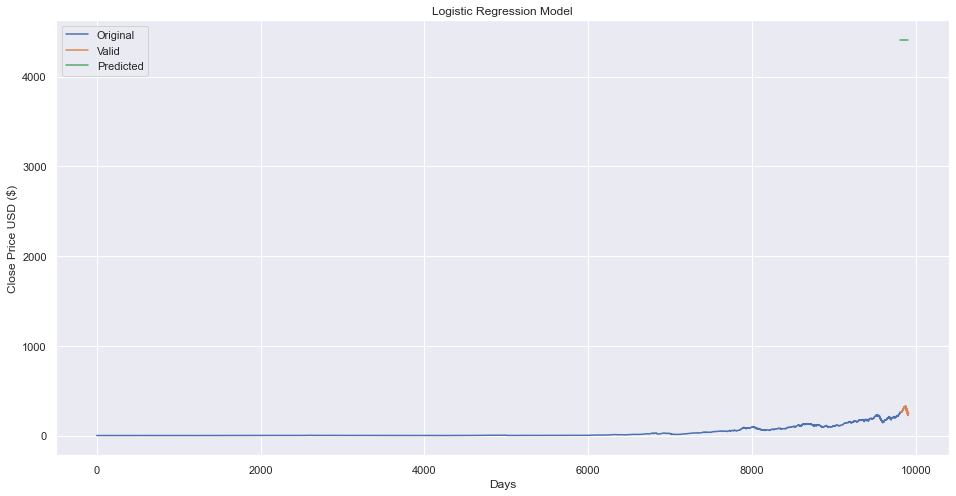

In [107]:
plt.figure(figsize=(16,8))
plt.title("Logistic Regression Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data3['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

# Time Series Algorithms 

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
model = RandomForestClassifier(n_estimators=100)

In [110]:
model.fit(X_train6, y_transformed)

RandomForestClassifier()

In [111]:
x_future = data3.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/1128973448.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



array([[198.44999695],
       [197.86999512],
       [199.46000671],
       [198.77999878],
       [198.58000183],
       [195.57000732],
       [199.80000305],
       [199.74000549],
       [197.91999817],
       [201.55000305],
       [202.72999573],
       [204.41000366],
       [204.22999573],
       [200.02000427],
       [201.24000549],
       [203.22999573],
       [201.75      ],
       [203.30000305],
       [205.21000671],
       [204.5       ],
       [203.3500061 ],
       [205.66000366],
       [202.58999634],
       [207.22000122],
       [208.83999634],
       [208.66999817],
       [207.02000427],
       [207.74000549],
       [209.67999268],
       [208.77999878],
       [213.03999329],
       [208.42999268],
       [204.02000427],
       [193.33999634],
       [197.        ],
       [199.03999329],
       [203.42999268],
       [200.99000549],
       [200.47999573],
       [208.97000122],
       [202.75      ],
       [201.74000549],
       [206.5       ],
       [210

In [112]:
time_series_prediction = model.predict(x_future)
print(time_series_prediction)

[4420 4411 4416 4414 4420 4417 4422 4426 4411 4418 4415 4413 4424 4310
 4454 4335 4419 4428 4412 4421 4428 4425 4427 4429 4430 4433 4438 4439
 4437 4465 4436 4440 4441 4349 4288 4446 4449 4454 4450 3899 4452 4419
 4458 4463 4463 4459 4459 4461 4466 4462 4464 3992 4465 4456 4338 4475
 4474 4457 4455 4467 4472 4477 4470 4473 4469 4478 4476 4477 4468 4110
 4471 4460 4451 4443 4447 4432 4431 4453 4445 4431 4448 4444 4423 4442
 4434 4442 4435 4404 4404 4399 4398 4382 4410 4400 4399 4410 4401 4406
 4405 4393]


In [113]:
predictions = time_series_prediction 
valid = data3[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/1709432889.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



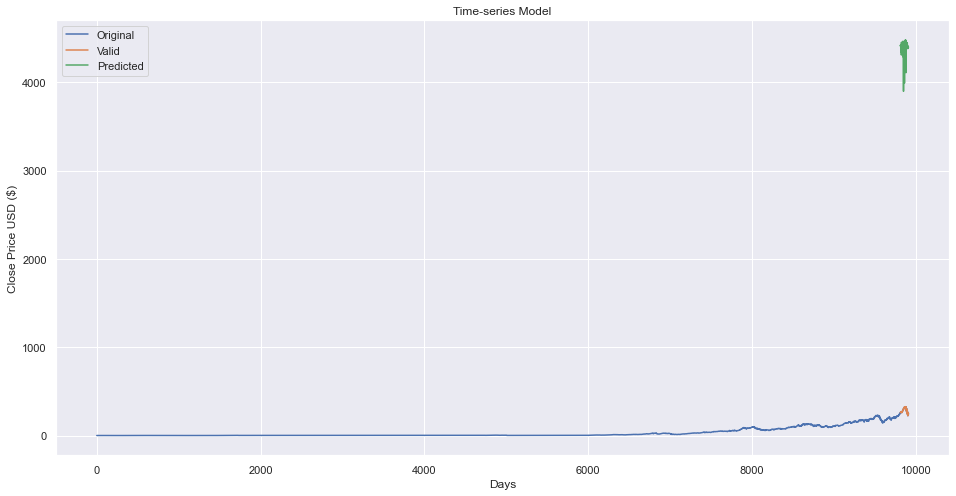

In [114]:
plt.figure(figsize=(16,8))
plt.title("Time-series Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data3['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

# Naïve Bayes Classifier 

In [115]:
from sklearn.naive_bayes import MultinomialNB

In [116]:
model=MultinomialNB(alpha=1.0)

In [117]:
model.fit(X_train6, y_transformed)

MultinomialNB()

In [118]:
x_future = data3.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/1128973448.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



array([[198.44999695],
       [197.86999512],
       [199.46000671],
       [198.77999878],
       [198.58000183],
       [195.57000732],
       [199.80000305],
       [199.74000549],
       [197.91999817],
       [201.55000305],
       [202.72999573],
       [204.41000366],
       [204.22999573],
       [200.02000427],
       [201.24000549],
       [203.22999573],
       [201.75      ],
       [203.30000305],
       [205.21000671],
       [204.5       ],
       [203.3500061 ],
       [205.66000366],
       [202.58999634],
       [207.22000122],
       [208.83999634],
       [208.66999817],
       [207.02000427],
       [207.74000549],
       [209.67999268],
       [208.77999878],
       [213.03999329],
       [208.42999268],
       [204.02000427],
       [193.33999634],
       [197.        ],
       [199.03999329],
       [203.42999268],
       [200.99000549],
       [200.47999573],
       [208.97000122],
       [202.75      ],
       [201.74000549],
       [206.5       ],
       [210

In [119]:
Naive_Bayes_prediction = model.predict(x_future)
print(Naive_Bayes_prediction)

[883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883
 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883
 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883
 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883
 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883 883
 883 883 883 883 883 883 883 883 883 883]


In [120]:
predictions = Naive_Bayes_prediction 
valid = data3[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/3595281136.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



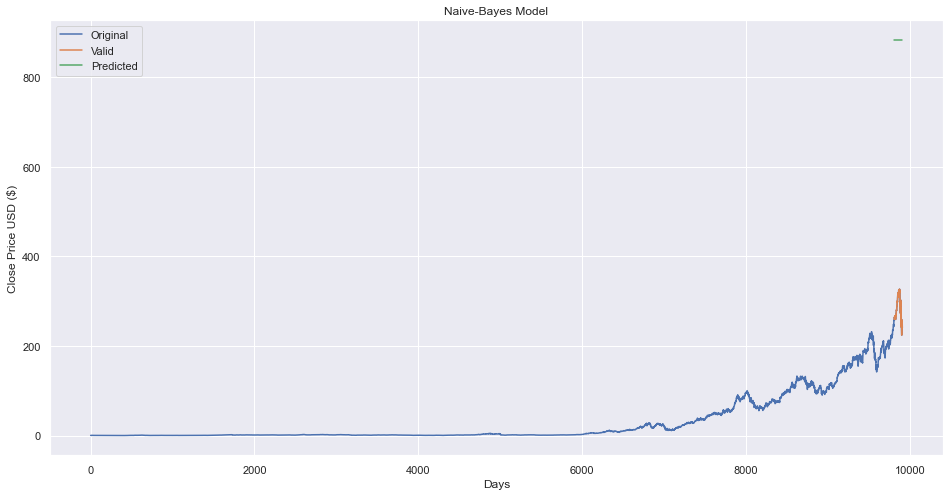

In [121]:
plt.figure(figsize=(16,8))
plt.title("Naive-Bayes Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data3['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

# Support Vector Machines

In [122]:
from sklearn.svm import SVC
from sklearn import preprocessing

In [123]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train6)

In [124]:
model = SVC()

In [125]:
model.fit(X_train6, y_transformed)

SVC()

In [126]:
x_future = data3.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/1128973448.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



array([[198.44999695],
       [197.86999512],
       [199.46000671],
       [198.77999878],
       [198.58000183],
       [195.57000732],
       [199.80000305],
       [199.74000549],
       [197.91999817],
       [201.55000305],
       [202.72999573],
       [204.41000366],
       [204.22999573],
       [200.02000427],
       [201.24000549],
       [203.22999573],
       [201.75      ],
       [203.30000305],
       [205.21000671],
       [204.5       ],
       [203.3500061 ],
       [205.66000366],
       [202.58999634],
       [207.22000122],
       [208.83999634],
       [208.66999817],
       [207.02000427],
       [207.74000549],
       [209.67999268],
       [208.77999878],
       [213.03999329],
       [208.42999268],
       [204.02000427],
       [193.33999634],
       [197.        ],
       [199.03999329],
       [203.42999268],
       [200.99000549],
       [200.47999573],
       [208.97000122],
       [202.75      ],
       [201.74000549],
       [206.5       ],
       [210

In [127]:
svc_prediction = model.predict(x_future)
print(svc_prediction)

[4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098
 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098
 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098
 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098
 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098
 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098
 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098 4098
 4098 4098]


In [128]:
predictions = svc_prediction 
valid = data3[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\DAVIDN~1\AppData\Local\Temp/ipykernel_31540/3515543957.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



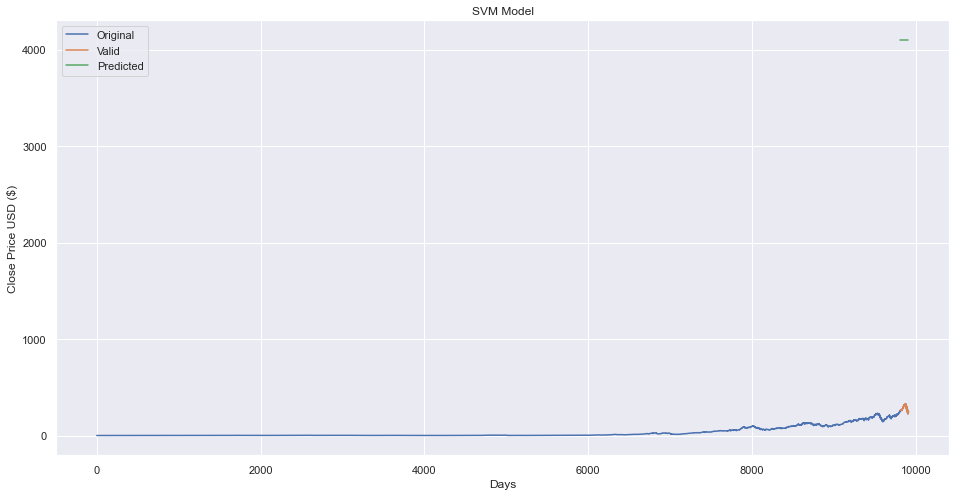

In [129]:
plt.figure(figsize=(16,8))
plt.title("SVM Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data3['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

# Output

# The End